In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.6 MB/s eta 0:00:00


In [2]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=14407742017d506db9a2712172f0fdc32bae0e6b6754b5370ff767cc83583ef6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv(r"/content/drive/MyDrive/heart_cleveland_upload.csv")

In [6]:
X = df.drop('condition', axis=1)
y = df['condition']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [7]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

Accuracy: 0.7
Precision: 0.625
Recall: 0.7692307692307693
F1-score: 0.6896551724137931
ROC AUC: 0.7081447963800904


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_val = logreg.predict(X_val_scaled)

auc = roc_auc_score(y_val, y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)


Accuracy: 0.7666666666666667
Precision: 0.75
Recall: 0.8
F1-score: 0.7741935483870969
ROC AUC: 0.7666666666666667


In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

y_pred_val = dtree.predict(X_val_scaled)
auc = roc_auc_score(y_val, y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1-score: 0.8000000000000002
ROC AUC: 0.8


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_val = rf.predict(X_val_scaled)

auc = roc_auc_score(y_val, y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", auc)

Accuracy: 0.8333333333333334
Precision: 0.8571428571428571
Recall: 0.8
F1-score: 0.8275862068965518
ROC AUC: 0.8333333333333334


In [11]:
import shap
explainer = shap.TreeExplainer(dtree)

target_index = 87

for target_index in range(10):
  shap_values = explainer.shap_values(X_test_scaled[target_index:target_index+1])

  feature_names = np.array(["Feature " + str(i) for i in range(X_train.shape[1])])
  print("\nSHAP Values for Target Data Point (index", target_index, "):")
  for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {shap_values[0][i]}")


SHAP Values for Target Data Point (index 0 ):
Feature 0: [ 0.02279225 -0.02279225]
Feature 1: [ 0.03137875 -0.03137875]
Feature 2: [-0.06463438  0.06463438]
Feature 3: [-0.06721896  0.06721896]
Feature 4: [ 0.02570204 -0.02570204]
Feature 5: [ 0.02010979 -0.02010979]
Feature 6: [ 0.00186391 -0.00186391]
Feature 7: [-0.01662537  0.01662537]
Feature 8: [0. 0.]
Feature 9: [-0.15109042  0.15109042]
Feature 10: [0. 0.]
Feature 11: [-0.11164029  0.11164029]
Feature 12: [-0.23072171  0.23072171]

SHAP Values for Target Data Point (index 1 ):
Feature 0: [ 0.02259547 -0.02259547]
Feature 1: [ 0.03226028 -0.03226028]
Feature 2: [ 0.01586711 -0.01586711]
Feature 3: [ 0.02473041 -0.02473041]
Feature 4: [ 0.03612683 -0.03612683]
Feature 5: [-0.0019128  0.0019128]
Feature 6: [-0.0021097  0.0021097]
Feature 7: [-0.00466368  0.00466368]
Feature 8: [0. 0.]
Feature 9: [-0.04123841  0.04123841]
Feature 10: [0. 0.]
Feature 11: [ 0.05471876 -0.05471876]
Feature 12: [ 0.32354136 -0.32354136]

SHAP Values f

In [12]:
import lime
from lime import lime_tabular
features = ["Age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
            "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
target_variable = "condition"
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=features,
    class_names=["No Heart Attack", "Heart Attack"],
    random_state=42
)

i = np.random.randint(0, X_test_scaled.shape[0])

i = np.random.randint(0, X_test_scaled.shape[0])
exp = explainer.explain_instance(X_test_scaled[i], rf.predict_proba, num_features=3, top_labels=1)

exp.show_in_notebook(show_table=True, show_all=False)

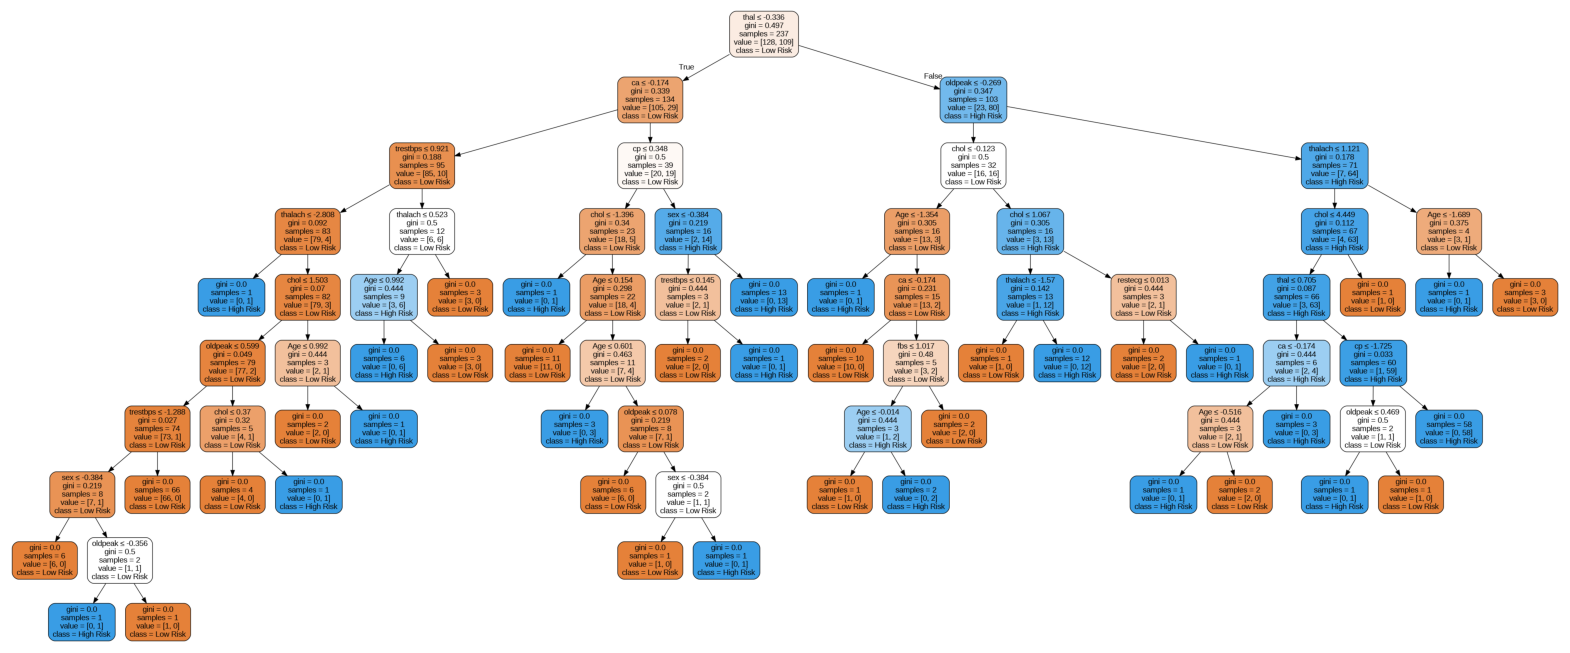

In [13]:
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree, out_file=None,
                           feature_names=features,
                           class_names=["Low Risk", "High Risk"],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("heart attack_decision_tree_UCI", format='png')


plt.figure(figsize=(20,10))
img = plt.imread("heart attack_decision_tree_UCI.png")
plt.imshow(img)
plt.axis('off')
plt.show()

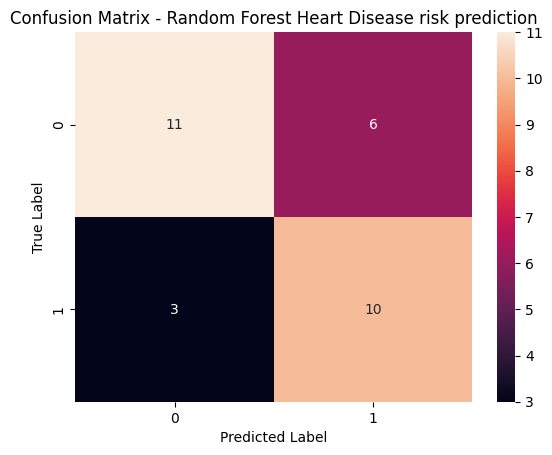

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest Heart Disease risk prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()